<a href="https://colab.research.google.com/github/sucinursania/UAS-KecerdasanBuatan/blob/main/TugasBesarAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Nearest Neighbors (KNN) dan linier regresion pada dataset SahamMNCBank.csv, untuk prediksi harga penutupan saham (Close)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/prak_ai/data/SahamMNCBank.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,Date,Open,High,Low,Close,Change,Change(%),Ratio(%),Volume,Value(T),Interval_High_Open,Interval_Open_From_LastDay,Interval_Open_From_LastDay(%)
0,8/30/2021,438,462,434,450,Rise,14,3.21,"5,444,095","244,258,988",24,2,0.458715596
1,8/27/2021,432,462,410,436,Unchnaged,0,0.00,"5,179,738","229,353,044",30,-4,-0.917431193
2,8/26/2021,470,472,436,436,Lower limit,32,6.83,"5,266,867","239,652,022",2,2,0.427350427
3,8/25/2021,476,500,452,468,Unchnaged,0,0.00,"14,433,942","691,292,155",24,8,1.709401709
4,8/24/2021,424,494,408,468,Rise,48,11.42,"14,218,161","640,991,240",70,4,0.952380952
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,1/8/2014,136,140,134,138,Rise,2,1.47,"19,968","271,130",4,0,0
1853,1/7/2014,137,137,135,136,Fall,1,0.72,"37,809","514,110",0,0,0
1854,1/6/2014,135,140,135,137,Fall,2,1.43,"39,089","535,709",5,-4,-2.877697842
1855,1/3/2014,140,143,137,139,Fall,4,2.79,"20,685","289,775",3,-3,-2.097902098


In [ ]:
f = df[['Date', 'Open', 'Close']]  # Seleksi fitur/kolom (yang dipake)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

In [ ]:
# Cek nilai null hanya pada ketiga kolom tersebut
print(df[['Date', 'Open', 'Close']].isnull().sum())

# Hapus duplikasi
df.drop_duplicates(inplace=True)
print(f"Data bersih: {df.shape[0]} baris")

Date     0
Open     0
Close    0
dtype: int64
Data bersih: 1857 baris


In [ ]:
#Persiapan Data
X = df[['Open']]
y = df['Close']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Normalisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Model KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)


In [ ]:
#Model Regresi Linear
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

In [ ]:
#Evaluasi
knn_mse = mean_squared_error(y_test, knn_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
knn_r2 = r2_score(y_test, knn_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"KNN - MSE: {knn_mse:.2f}, R2: {knn_r2:.4f}")
print(f"Linear Regression - MSE: {lr_mse:.2f}, R2: {lr_r2:.4f}")

KNN - MSE: 45.78, R2: 0.9892
Linear Regression - MSE: 47.73, R2: 0.9887


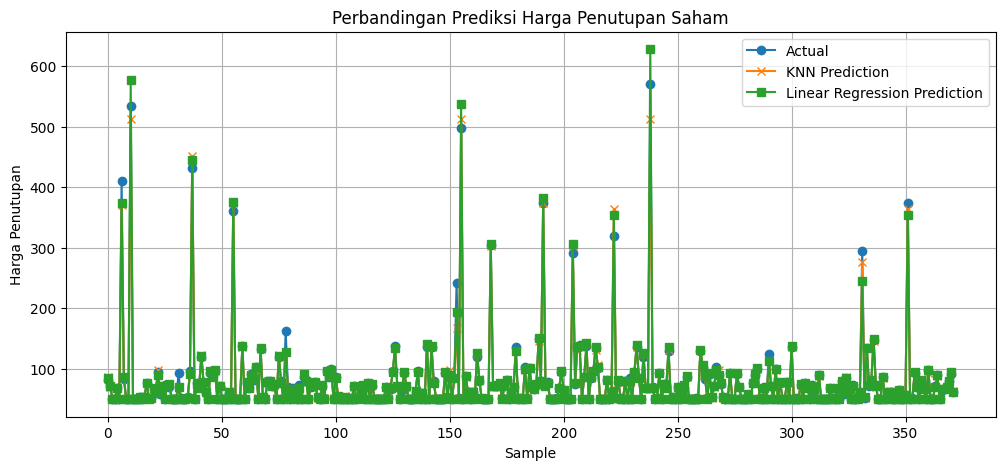

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(knn_pred, label='KNN Prediction', marker='x')
plt.plot(lr_pred, label='Linear Regression Prediction', marker='s')
plt.title("Perbandingan Prediksi Harga Penutupan Saham")
plt.xlabel("Sample")
plt.ylabel("Harga Penutupan")
plt.legend()
plt.grid(True)
plt.show()

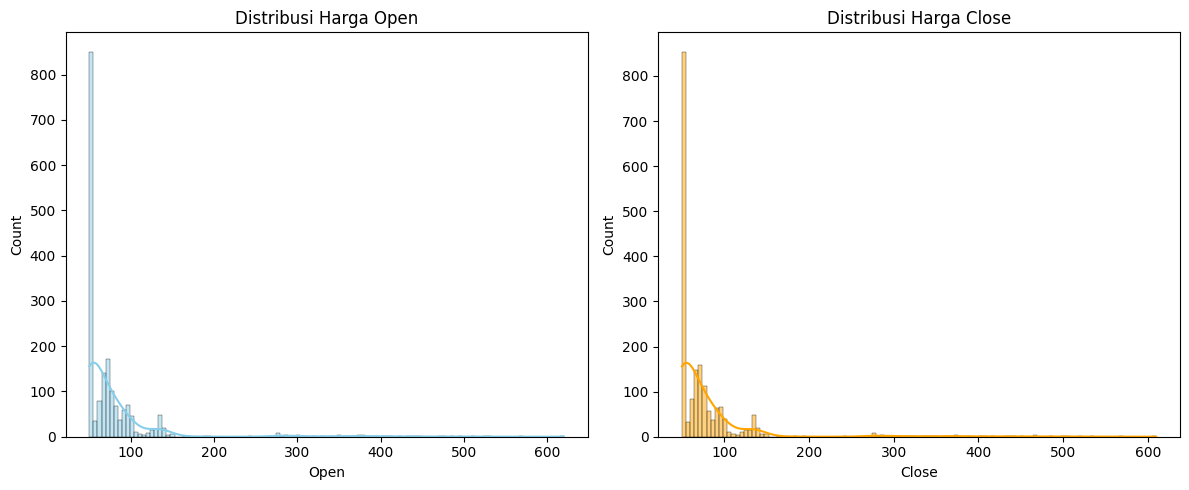

In [ ]:
# Histogram Distribusi Data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Open'], kde=True, color='skyblue')
plt.title('Distribusi Harga Open')

plt.subplot(1, 2, 2)
sns.histplot(df['Close'], kde=True, color='orange')
plt.title('Distribusi Harga Close')

plt.tight_layout()
plt.show()

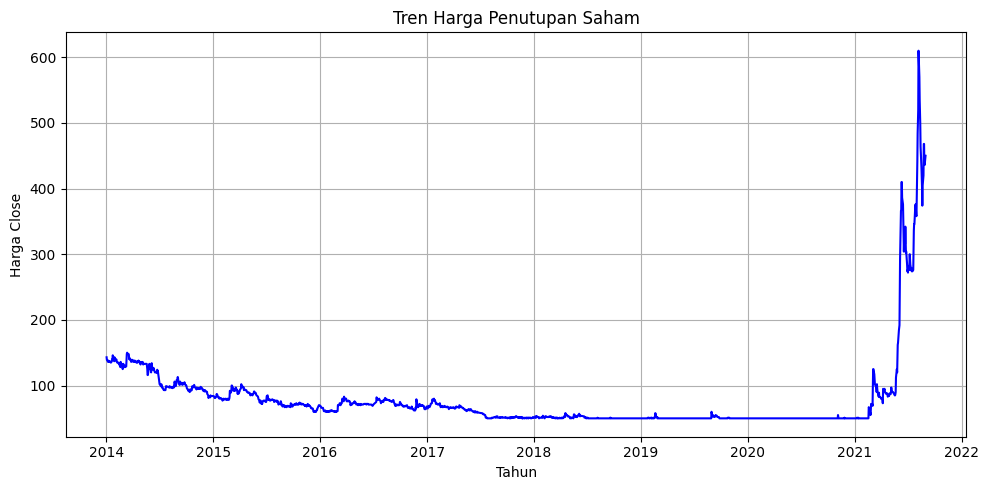

In [ ]:
# 3. Line Chart – Tren Harga Penutupan
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.title("Tren Harga Penutupan Saham")
plt.xlabel("Tahun")
plt.ylabel("Harga Close")
plt.grid(True)
plt.tight_layout()
plt.show()


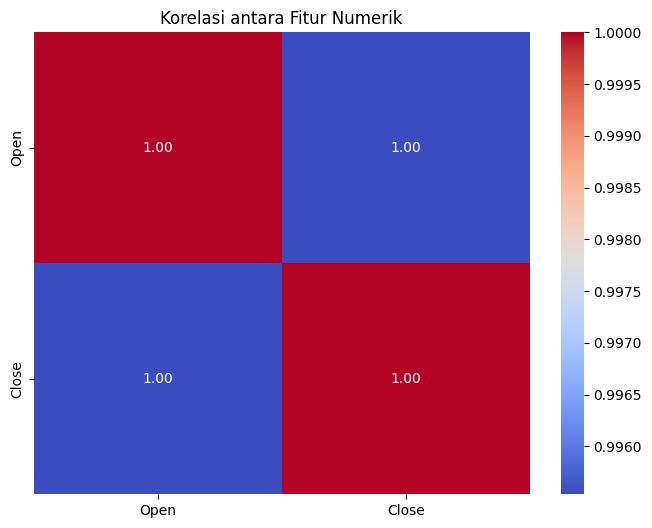

In [ ]:
# Heatmap Korelasi
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation calculation
corr_df = df[['Open', 'Close']].copy()
corr = corr_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antara Fitur Numerik")
plt.show()

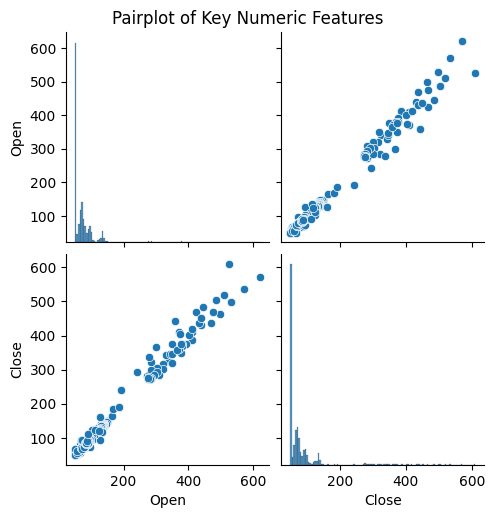

In [ ]:
# Pairplot (hubungan antar fitur) - limiting to a few key numeric columns for clarity
# Selecting 'Open', 'High', 'Low', 'Close', 'Volume' for pairplot
pairplot_cols = ['Open','Close']
sns.pairplot(df[pairplot_cols])
plt.suptitle("Pairplot of Key Numeric Features", y=1.02)
plt.show()

/tmp/ipython-input-22-3645146065.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='Set2')


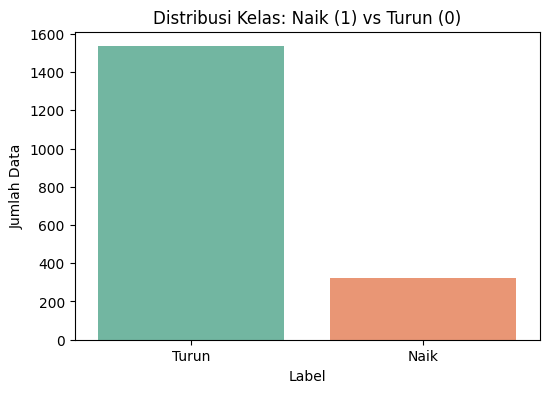

In [ ]:
# Buat kolom Kategori: Naik (1) jika Close > Open, Turun (0) jika Close <= Open
df['Label'] = (df['Close'] > df['Open']).astype(int)

# Cek distribusi label
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=df, palette='Set2')
plt.title("Distribusi Kelas: Naik (1) vs Turun (0)")
plt.xticks([0, 1], ['Turun', 'Naik'])
plt.ylabel("Jumlah Data")
plt.show()

In [ ]:
# Statistik deskriptif
print("Statistik Deskriptif:")
print(df[['Open', 'Close']].describe())

# Korelasi sederhana
print("\nKorelasi Open dan Close:", df['Open'].corr(df['Close']))

# Insight singkat
naik = df[df['Label'] == 1].shape[0]
turun = df[df['Label'] == 0].shape[0]
print(f"\nJumlah hari harga naik: {naik}")
print(f"Jumlah hari harga turun: {turun}")


Statistik Deskriptif:
              Open        Close
count  1857.000000  1857.000000
mean     78.060312    78.022079
std      59.254470    59.800558
min      50.000000    50.000000
25%      50.000000    50.000000
50%      61.000000    61.000000
75%      80.000000    80.000000
max     620.000000   610.000000

Korelasi Open dan Close: 0.9955380886268013

Jumlah hari harga naik: 323
Jumlah hari harga turun: 1534
